In [31]:
#Allow IPython to work with matplotlib figures
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Install IRkernal package for jupyter notebook to talk to R
* Replaces previous call ```load_ext rpy2.ipython```

In [14]:
# Install IRkernel package 
%R install.packages(c('repr', 'IRdisplay', 'crayon', 'pbdZMQ', 'devtools'))
%R devtools::install_github('IRkernel/IRkernel')
%R IRkernel::installspec()  # to register the kernel in the current R installation

/Users/hputnam/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: trying URL 'https://cran.cnr.berkeley.edu/bin/macosx/mavericks/contrib/3.3/repr_0.9.tgz'

  warnings.warn(x, RRuntimeWarning)
/Users/hputnam/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/Users/hputnam/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning:  length 55507 bytes (54 KB)

  warnings.warn(x, RRuntimeWarning)
/Users/hputnam/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: =
  warnings.warn(x, RRuntimeWarning)
/Users/hputnam/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)
/Users/hputnam/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: downloaded 54 KB


  warnings.warn(x, RRuntim


The downloaded binary packages are in
	/var/folders/49/t6xmj4zs6jj9fpzpltfp6rcm0000gp/T//RtmpWJzIsE/downloaded_packages


/Users/hputnam/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Downloading GitHub repo IRkernel/IRkernel@master
from URL https://api.github.com/repos/IRkernel/IRkernel/zipball/master

  warnings.warn(x, RRuntimeWarning)
/Users/hputnam/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Installing IRkernel

  warnings.warn(x, RRuntimeWarning)
/Users/hputnam/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: trying URL 'https://cran.cnr.berkeley.edu/bin/macosx/mavericks/contrib/3.3/uuid_0.1-2.tgz'

  warnings.warn(x, RRuntimeWarning)
/Users/hputnam/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning:  length 24924 bytes (24 KB)

  warnings.warn(x, RRuntimeWarning)
/Users/hputnam/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: downloaded 24 KB


  warnings.warn(x, RRuntimeWarning)
/Users/hputnam/anaconda

array([0], dtype=int32)

# Install necessary R packages and load libraries

In [16]:
%%R
#UNCOMMENT IF YOU NEED TO INSTALL PACKAGES
# dependencies
#install.packages( c("data.table","devtools"))
#source("http://bioconductor.org/biocLite.R")
#biocLite(c("GenomicRanges","IRanges"))

# install the development version from github
library(devtools)
install_github("al2na/methylKit",build_vignettes=FALSE)

/Users/hputnam/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Skipping install of 'methylKit' from a github remote, the SHA1 (e3884b8d) has not changed since last install.
  Use `force = TRUE` to force installation

  warnings.warn(x, RRuntimeWarning)


In [17]:
#Load Library methylKit
%R library(methylKit)

array(['methylKit', 'GenomicRanges', 'GenomeInfoDb', 'IRanges',
       'S4Vectors', 'stats4', 'BiocGenerics', 'parallel', 'devtools',
       'tools', 'stats', 'graphics', 'grDevices', 'utils', 'datasets',
       'methods', 'base'], 
      dtype='<U13')

# Identify files for analysis

In [5]:
#Identify the list of file names
%%R file.list <- list 
('mkfmt_zr1394_1_10K.txt',
'mkfmt_zr1394_2_10K.txt',
'mkfmt_zr1394_3_10K.txt',
'mkfmt_zr1394_4_10K.txt',
'mkfmt_zr1394_5_10K.txt',
'mkfmt_zr1394_6_10K.txt',
'mkfmt_zr1394_7_10K.txt',
'mkfmt_zr1394_8_10K.txt',
'mkfmt_zr1394_9_10K.txt',
'mkfmt_zr1394_10_10K.txt',
'mkfmt_zr1394_11_10K.txt',
'mkfmt_zr1394_12_10K.txt',
'mkfmt_zr1394_13_10K.txt',
'mkfmt_zr1394_14_10K.txt',
'mkfmt_zr1394_15_10K.txt',
'mkfmt_zr1394_16_10K.txt',
'mkfmt_zr1394_17_10K.txt',
'mkfmt_zr1394_18_10K.txt')

In [18]:
#merges the sample name with the sample files
%%R
myobj=read(file.list,sample.id=list("hc1_2B",
"hc1_4B",
"hc2_15B",
"hc2_17",
"hc3_1",
"hc3_5",
"hc3_7",
"hc3_10",
"hc3_11",
"ss2_9B",
"ss2_14B",
"ss2_18B",
"ss3_3B",
"ss3_14B",
"ss3_15B",
"ss3_16B",
"ss3_20",
"ss5_18"),assembly="v9",treatment=c(0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1))

In [21]:
#unites methylRawList and methylRawListDB objects that only bases with coverage from all samples are retained 
#generates percent methylation matrix
%R meth<-unite(myobj)

R object with classes: ('methylBase',) mapped to:
<ListVector - Python:0x10acdb9c8 / R:0x135835130>
[Facto..., IntVe..., IntVe..., ..., IntVe..., Float..., Float...]
  chr: <class 'rpy2.robjects.vectors.FactorVector'>
  R object with classes: ('factor',) mapped to:
<FactorVector - Python:0x1316b8408 / R:0x14fca7000>
[       1,        1,        1, ...,     2597,     2597,     2597]
  start: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x104a8fd88 / R:0x14e1e0c00>
[    5197,     5309,     5322, ...,     4792,     4800,     4805]
  end: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x117467588 / R:0x14e1f3200>
[    5197,     5309,     5322, ...,     4792,     4800,     4805]
  ...
  chr: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x11745fc88 / R:0x152fb2400>
[      21,      103,       96, ...,

# Run clustering and PCA and plot results

/Users/hputnam/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The "ward" method has been renamed to "ward.D"; note new "ward.D2"

  warnings.warn(x, RRuntimeWarning)


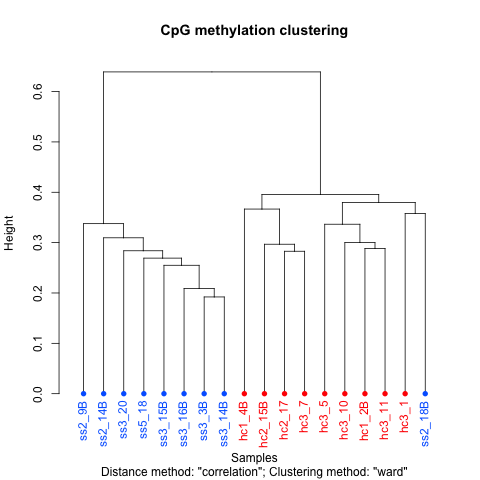

/Users/hputnam/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Error in hclust(d = d, method = HCLUST.METHODS[hclust.method]) : 
  object 'HCLUST.METHODS' not found

  warnings.warn(x, RRuntimeWarning)


R object with classes: ('hclust',) mapped to:
<ListVector - Python:0x1316c4388 / R:0x14e167470>
[Matrix, Float..., IntVe..., ..., StrVe..., Vector, StrVe...]
  merge: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x1174783c8 / R:0x10ad79440>
[     -13,      -16,      -15, ...,       13,       15,       16]
  height: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x1316c4e08 / R:0x1173e1300>
[0.192126, 0.208912, 0.255017, ..., 0.379897, 0.395662, 0.639027]
  order: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x1316c4f08 / R:0x129302d50>
[      10,       11,       17, ...,        9,        5,       12]
  ...
  merge: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x1316c4c88 / R:0x11f4d7a18>
['ward.D']
  height: <class 'rpy2.robjects

In [26]:
#cluster samples by methylation similarity
%R hc<- clusterSamples(meth, dist="correlation", method="ward", plot=T)

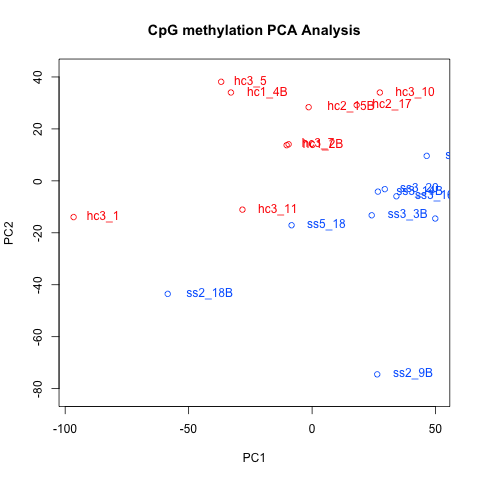

In [29]:
# Run PCA using prcomp function using percent methylation matrix as an input
%R PCA<-PCASamples(meth, scale=T, center=T)

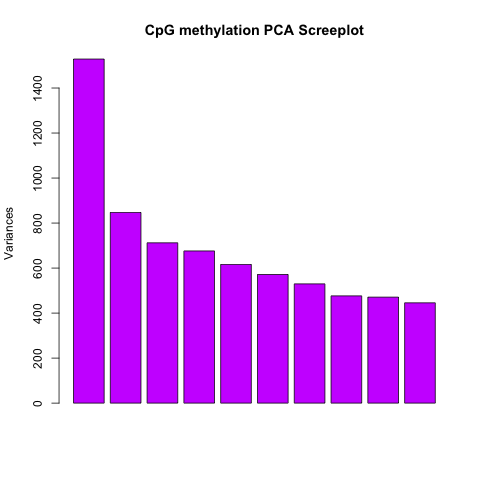

In [30]:
# Run PCA using prcomp function using percent methylation matrix as an input
%R PCA<-PCASamples(meth, scale=T, center=T, screeplot=T)